# Biodiversity Project

For this project, we will interpret data from the National Parks Service about endangered species in different parks.

We will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered.

We have been given 2 datasets:
* species_info.csv - contains data about different species and their conservation status
* observations.csv - holds recorded sightings of different species at several national parks for the past 7 days.


The datasets provided have the following columns of data:

species_info.csv:

* category - class of animal
* scientific_name - the scientific name of each species
* common_name - the common names of each species
* conservation_status - each species’ current conservation status

observations.csv:

* scientific_name - the scientific name of each species
* park_name - Park where species were found
* observations - the number of times each species was observed at park


The goal of this project is to do some exploratory data analysis, as well as to answer some questions like:

* What is the distribution of conservation_status for animals?
* Are certain types of species more likely to be endangered?
* Are the differences between species and their conservation status significant?
* Which species were spotted the most at each park?


### 1 - Import the data

We start by importing the necessary libraries

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Now we import both libraries and put them into pandas dataframes

In [32]:
species = pd.read_csv('species_info.csv',encoding='utf-8')

obs = pd.read_csv('observations.csv',encoding='utf-8')

### 2 - Exploratory Data Analysis

time to get aquainte with the data and do some exploratory data analysis, we start with the first dataset

In [33]:
print(species.head())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  


In [34]:
print(species.columns)

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


In [35]:
print(species.describe())

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  


In [36]:
print(species.isna().sum())

category                  0
scientific_name           0
common_names              0
conservation_status    5633
dtype: int64


We can see that the conservation_status column has a very large number of missing data unlike the other columns, but we might have duplicates so let's do some cleaning

In [37]:
species_duplicates = species.duplicated()
print(species_duplicates.value_counts())
species = species.drop_duplicates()
species_duplicates = species.duplicated()
print(species_duplicates.value_counts())

False    5824
dtype: int64
False    5824
dtype: int64


We don't have any duplicates, now let's fill the missing rows with the appropriate values, since we don't really know or have information about why we have missing data in that column, we will just replace it with "No Info"

In [38]:
species['conservation_status'] = species['conservation_status'].fillna('No Info')

print(species.conservation_status.value_counts())

No Info               5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


Let's check the difference animal species that we have and their numbers in this dataset

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64


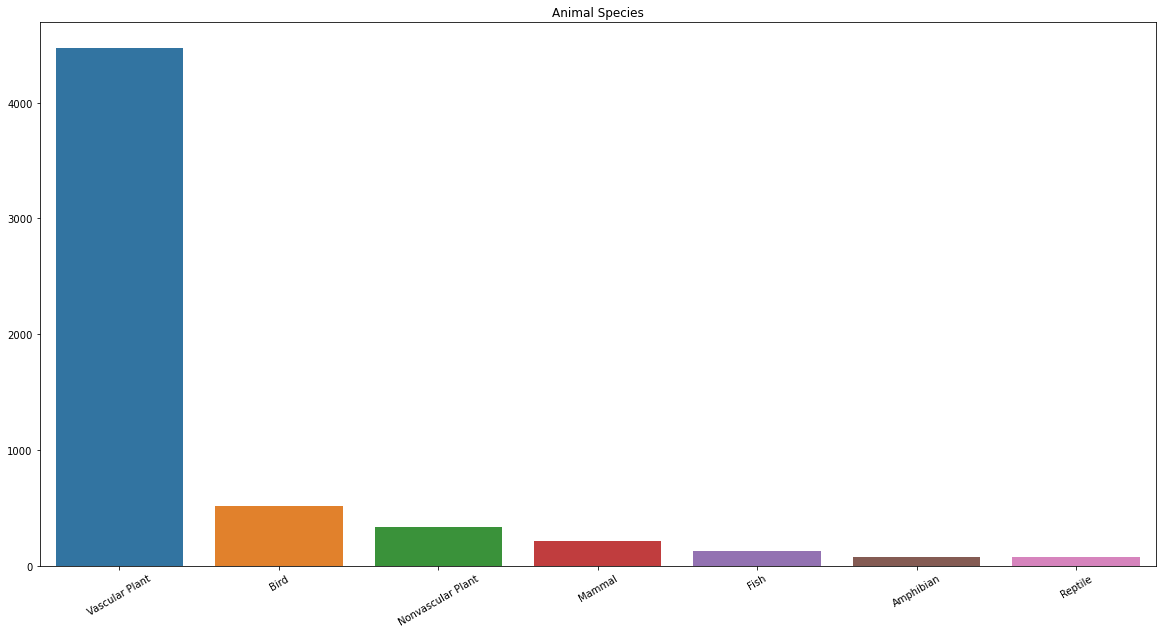

<Figure size 432x288 with 0 Axes>

In [39]:
print(species.category.value_counts())
category_number = species.category.value_counts()
plt.figure(figsize=(20, 10))
sns.barplot(x=category_number.index, y=category_number.values)
plt.xticks(rotation=30)
plt.title('Animal Species')
plt.show()
plt.clf()

We have 7 species, a large number of vascular plants and a small number of Amphibian and Reptiles

Now let's explore the second database

In [40]:
print(obs.head())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85


In [41]:
print(obs.columns)

Index(['scientific_name', 'park_name', 'observations'], dtype='object')


Let's check how many parks we have in this dataset

In [42]:
print(obs.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


We have 4 parks, let's clean the names to make them simpler looking for the visualization, we now that these are all national parks so let's drop that from the name

In [43]:
obs['park_name'] = obs['park_name'].str.strip(' National Park')
print(obs.park_name.unique())

['Great Smoky Mountains' 'Yosemite' 'Bryce' 'Yellowstone']


Let's drop duplicates

In [44]:
obs_duplicates = obs.duplicated()
print(obs_duplicates.value_counts())
obs = obs.drop_duplicates()
obs_duplicates = obs.duplicated()
print(obs_duplicates.value_counts())

False    23281
True        15
dtype: int64
False    23281
dtype: int64


Now let's see how the parks are distrubuted in this dataset

In [45]:
print(obs.park_name.value_counts())

Bryce                    5823
Yosemite                 5821
Yellowstone              5819
Great Smoky Mountains    5818
Name: park_name, dtype: int64


They are distrubuted evenly, minus a few here and there because we dropped duplicates

Now let's calculate the total number of observations we have for all the parks in the last 7 days

In [46]:
print(obs.observations.sum())

3312429


That's more than 3 million observations, 3312429 to be exact

Now let's see how many observations there are per park

park_name
Bryce                     575901
Great Smoky Mountains     431378
Yellowstone              1442314
Yosemite                  862836
Name: observations, dtype: int64


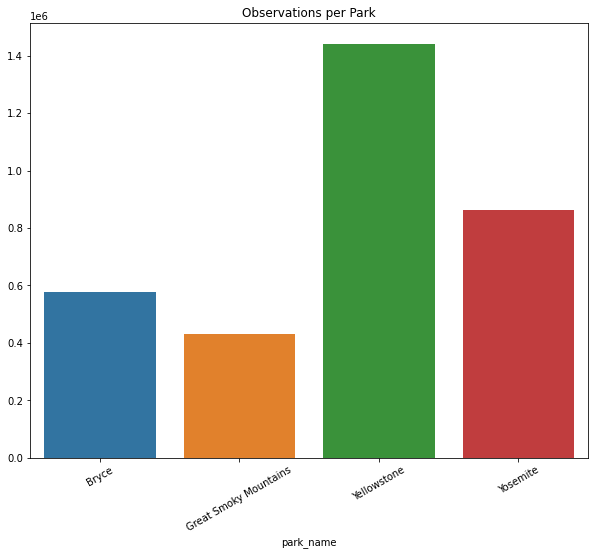

<Figure size 432x288 with 0 Axes>

In [47]:
print(obs.groupby('park_name').observations.sum())
park_number = obs.groupby('park_name').observations.sum()
plt.figure(figsize=(10, 8))
sns.barplot(x=park_number.index, y=park_number.values)
plt.xticks(rotation=30)
plt.title('Observations per Park')
plt.show()
plt.clf()

The Yellowstone national park has the most amount of observations with 1442314 and the Great Smoky Mountains national park has the least amount with 431378

In [48]:
print(obs.describe(include='all'))

          scientific_name park_name  observations
count               23281     23281  23281.000000
unique               5541         4           NaN
top     Castor canadensis     Bryce           NaN
freq                   12      5823           NaN
mean                  NaN       NaN    142.280357
std                   NaN       NaN     69.885439
min                   NaN       NaN      9.000000
25%                   NaN       NaN     86.000000
50%                   NaN       NaN    124.000000
75%                   NaN       NaN    195.000000
max                   NaN       NaN    321.000000


### 3 - Analysis and answering the questions:

The first questions is:
* What is the distribution of conservation_status for animals?

let's answer this by plotting a visualization that will help us do the analysis

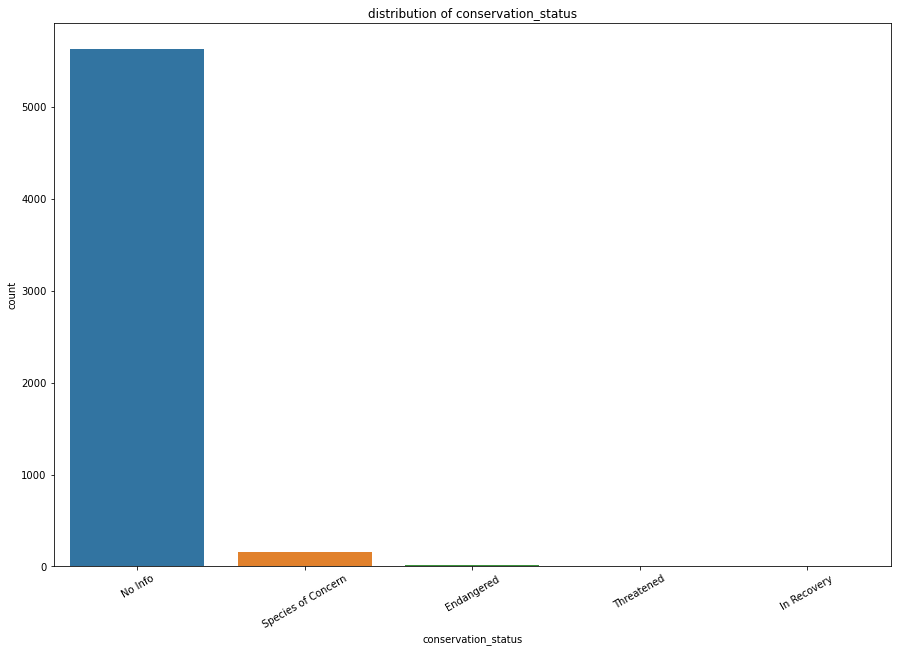

<Figure size 432x288 with 0 Axes>

In [49]:
plt.figure(figsize=(15, 10))
sns.countplot(x='conservation_status', data=species)
plt.xticks(rotation=30)
plt.title('distribution of conservation_status')
plt.show()
plt.clf()

The majority of animals are not part of the endangered species, but this is due to the missing data, we don't really know why as the data missing, but we can drop the "No Info" rows and plot again

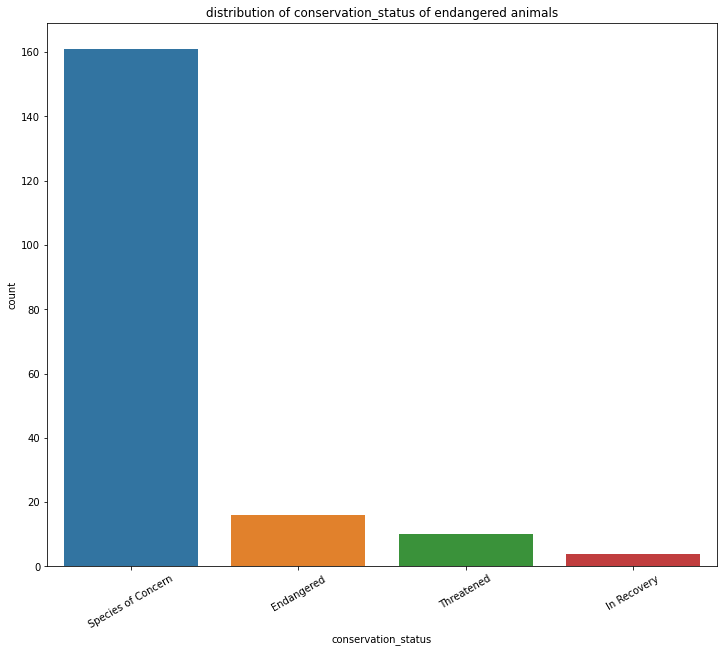

<Figure size 432x288 with 0 Axes>

In [50]:
endagered_species = species[species['conservation_status'] != 'No Info']

plt.figure(figsize=(12, 10))
sns.countplot(x='conservation_status', data=endagered_species)
plt.xticks(rotation=30)
plt.title('distribution of conservation_status of endangered animals')
plt.show()
plt.clf()

The biggest number is the species of concern followed by endangered and threatened thas has a much lower number, and in last position we have in recovery

The second question is:
* Are certain types of species more likely to be endangered?

We need to plot so that we can do the analysis

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                   1     4     3       7                  0   
In Recovery                  0     3     0       1                  0   
Species of Concern           4    72     4      28                  5   
Threatened                   2     0     4       2                  0   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered                 0               1  
In Recovery                0               0  
Species of Concern         5              43  
Threatened                 0               2  


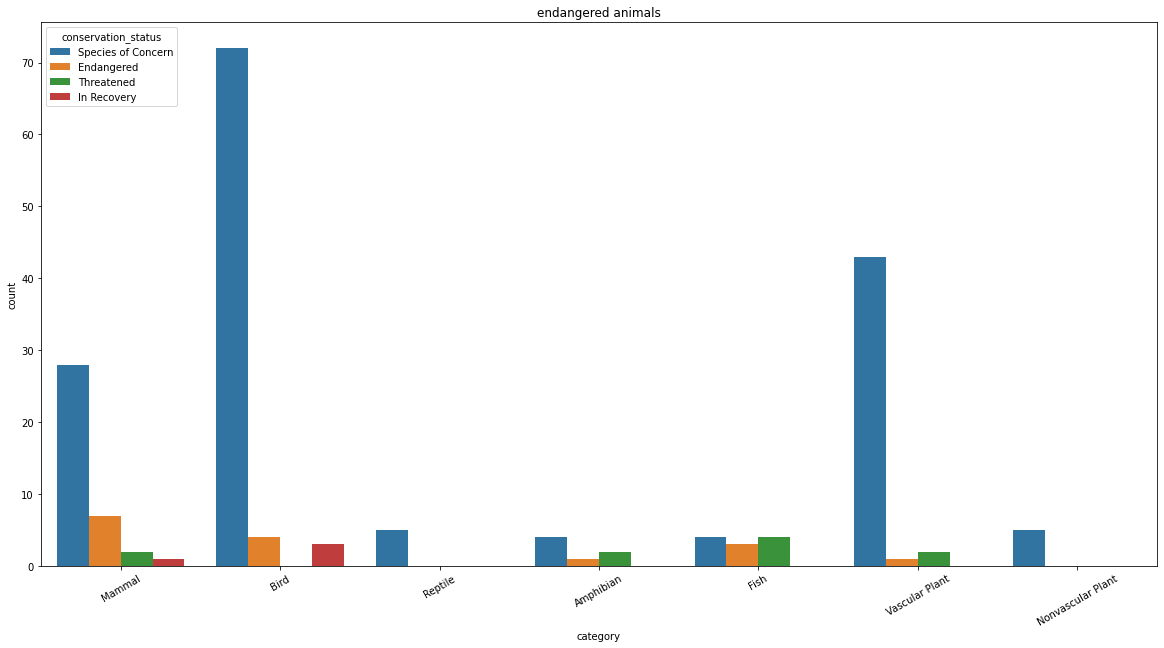

<Figure size 432x288 with 0 Axes>

In [51]:
print(pd.crosstab(endagered_species.conservation_status, endagered_species.category))

plt.figure(figsize=(20, 10))
sns.countplot(x=endagered_species['category'], hue='conservation_status', data=endagered_species)
plt.xticks(rotation=30)
plt.title('endangered animals')
plt.show()
plt.clf()

The birds are the most "species of concern" followed by vascular plants, while the fish are the least species of conercn and the most endangered ones are mammals. Only two species are in recovery, the mammals and the birds, while only a small amount of reptiles are part of the spececies or concern and that's it

From the data that we have, most likely the birds mammals and vascular plants are thes most likely endangered while the others are less likely

The third question is:
* Are the differences between species and their conservation status significant?

Let's try to answer that

If we go back the plot that we did earlier that shows all the animal species that we have in this dataset and compare it with the plot of the animal species with their conservation status, we get this:

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: category, dtype: int64


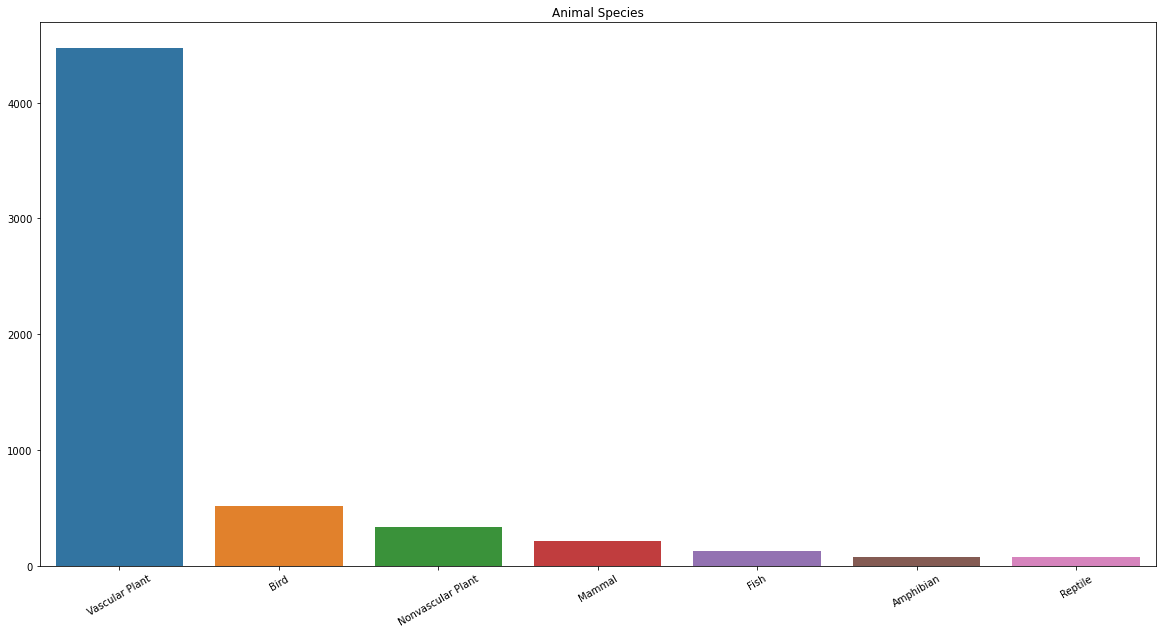

<Figure size 432x288 with 0 Axes>

In [52]:
print(species.category.value_counts())
category_number = species.category.value_counts()
plt.figure(figsize=(20, 10))
sns.barplot(x=category_number.index, y=category_number.values)
plt.xticks(rotation=30)
plt.title('Animal Species')
plt.show()
plt.clf()

category             Amphibian  Bird  Fish  Mammal  Nonvascular Plant  \
conservation_status                                                     
Endangered                   1     4     3       7                  0   
In Recovery                  0     3     0       1                  0   
No Info                     73   442   116     176                328   
Species of Concern           4    72     4      28                  5   
Threatened                   2     0     4       2                  0   

category             Reptile  Vascular Plant  
conservation_status                           
Endangered                 0               1  
In Recovery                0               0  
No Info                   74            4424  
Species of Concern         5              43  
Threatened                 0               2  


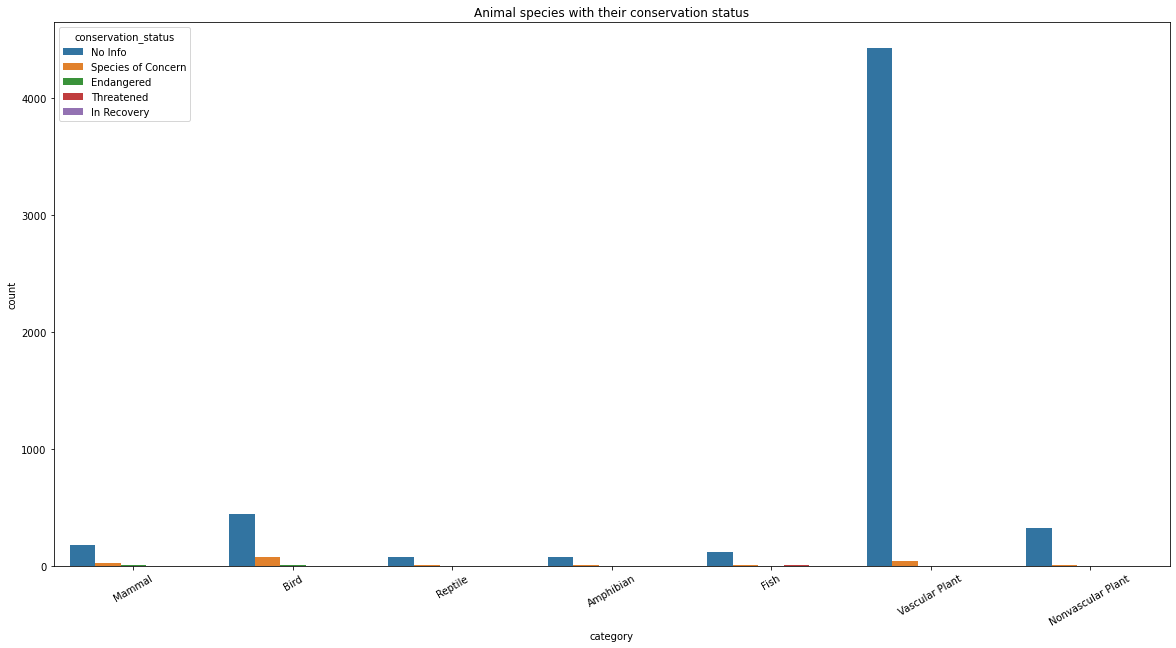

<Figure size 432x288 with 0 Axes>

In [53]:
print(pd.crosstab(species.conservation_status, species.category))

plt.figure(figsize=(20, 10))
sns.countplot(x=species['category'], hue='conservation_status', data=species)
plt.xticks(rotation=30)
plt.title('Animal species with their conservation status')
plt.show()
plt.clf()

We can see that there isn't much difference between the species and their conservation status

And now the last question:
* Which species were spotted the most at each park?

for this we will have to merge the two datasets

In [54]:
species_obs = pd.merge(species, obs, on='scientific_name')
print(species_obs.head())

  category                scientific_name              common_names  \
0   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
1   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
2   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
3   Mammal  Clethrionomys gapperi gapperi  Gapper's Red-Backed Vole   
4   Mammal                      Bos bison     American Bison, Bison   

  conservation_status              park_name  observations  
0             No Info                  Bryce           130  
1             No Info            Yellowstone           270  
2             No Info  Great Smoky Mountains            98  
3             No Info               Yosemite           117  
4             No Info               Yosemite           128  


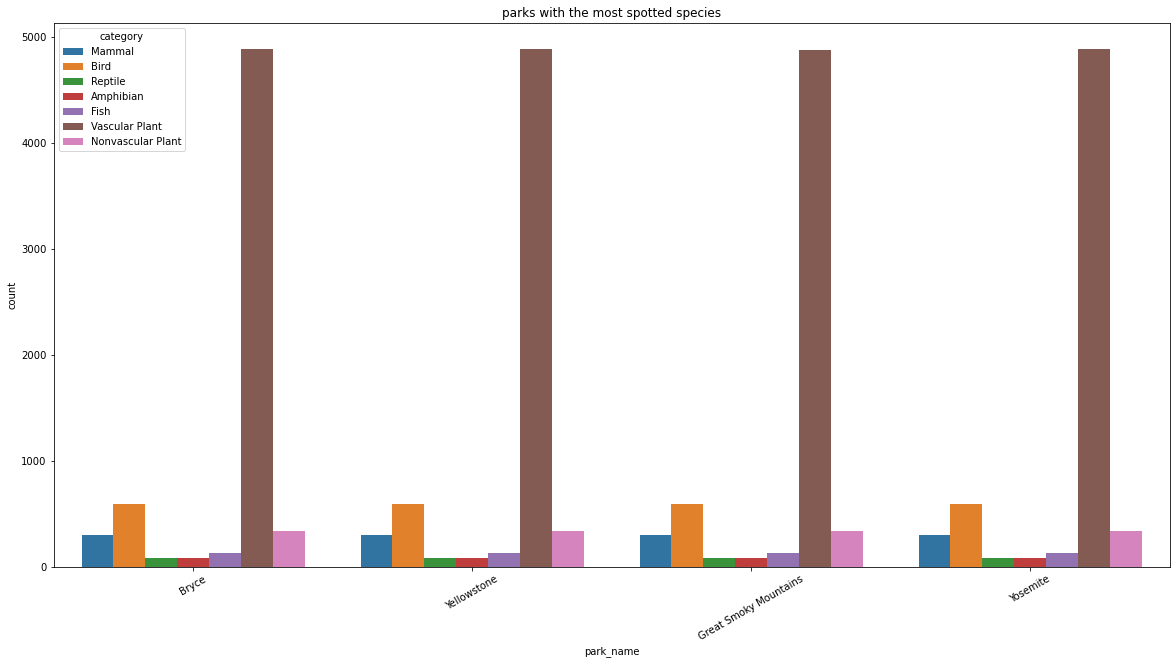

<Figure size 432x288 with 0 Axes>

In [55]:
plt.figure(figsize=(20, 10))
sns.countplot(x='park_name', hue=species_obs['category'], data=species_obs)
plt.xticks(rotation=30)
plt.title('parks with the most spotted species')
plt.show()
plt.clf()

In [56]:
print(pd.crosstab(species_obs.category, species_obs.park_name))

park_name          Bryce  Great Smoky Mountains  Yellowstone  Yosemite
category                                                              
Amphibian             82                     82           82        82
Bird                 591                    591          588       591
Fish                 131                    131          131       131
Mammal               300                    300          298       300
Nonvascular Plant    333                    333          333       333
Reptile               81                     81           81        81
Vascular Plant      4888                   4878         4884      4884


The vascular plants were the species spotted the most in the 4 parks, with the reptiles and amphibians being the least spotted

Now let's check the same thing without the "No Info" rows

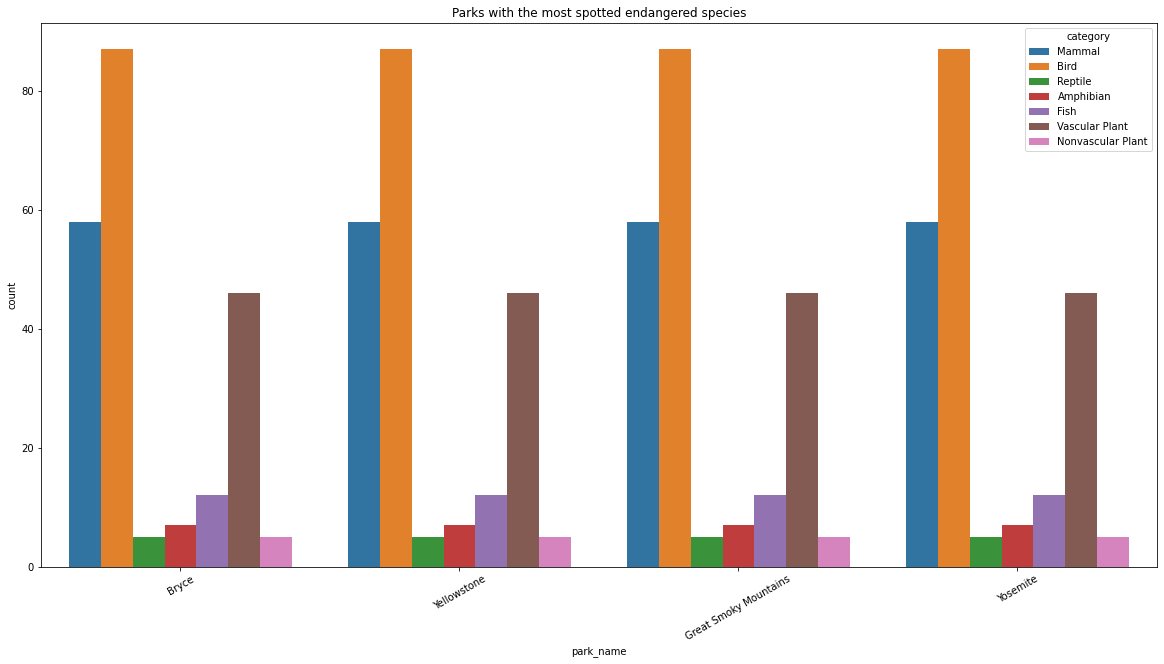

<Figure size 432x288 with 0 Axes>

In [57]:
endagered_species_obs = species_obs[species_obs['conservation_status'] != 'No Info']

plt.figure(figsize=(20, 10))
sns.countplot(x='park_name', hue=species_obs['category'], data=endagered_species_obs)
plt.xticks(rotation=30)
plt.title('Parks with the most spotted endangered species')
plt.show()
plt.clf()

In [58]:
print(pd.crosstab(endagered_species_obs.category, endagered_species_obs.park_name))

park_name          Bryce  Great Smoky Mountains  Yellowstone  Yosemite
category                                                              
Amphibian              7                      7            7         7
Bird                  87                     87           87        87
Fish                  12                     12           12        12
Mammal                58                     58           58        58
Nonvascular Plant      5                      5            5         5
Reptile                5                      5            5         5
Vascular Plant        46                     46           46        46


The birds are the most spotted endangered species in the 4 parks, followed by the mammals and than the vascular plants, while reptiles, as before, as the least spotted

### 4 - Conclusion:

After the analysis we learned that:
* The majority of the species in the 2 datasets are not endangered, only 3% are, but this is due to the missing data that we have, we are not sure why we are missing that data
* There isn't much difference between the species and their conservation status
* The birds are the species that are most endangered while the reptiles are the least endangered
* The species that are most spotted in the 4 national parks are the birds first and foremost

We learned quite a few things about these endangered species but the analysis is limited by the data available to us

the data had a lot of missing values, having that data would've helped us make a better stronger analysis, as we don't really know why we are missind the data, we don't know the methods that were used in capturing this data otherwise the conclusion could be quite different from what we found